In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
heart = pd.read_csv('/Users/jacikapatel/Desktop/Springboard/Heart Disease/heart.csv')

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
categorical_variables = [
    "sex", "cp", "fbs", "restecg",
    "exang", "slope", "ca", "thal", "target"
]

continuous_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Convert columns to 'object' type
heart[categorical_variables] = heart[categorical_variables].apply(lambda x: x.astype("object"))


In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [9]:
heart.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [10]:
heart.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [11]:
sex_grouped = heart.groupby('sex').mean()
age_grouped = heart.groupby('age').mean()


In [12]:
sex_grouped

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125,0.75
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [13]:
age_grouped

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
29,1.0,1.0,130.000000,204.000000,0.0,0.0,202.000000,0.0,0.000000,2.0,0.0,2.0,1.0
34,0.5,2.0,118.000000,196.000000,0.0,0.5,183.000000,0.0,0.350000,2.0,0.0,2.0,1.0
35,0.75,0.25,126.500000,213.750000,0.0,0.75,160.500000,0.5,0.750000,1.75,0.0,2.5,0.5
37,0.5,2.0,125.000000,232.500000,0.0,1.0,178.500000,0.0,1.750000,1.0,0.0,2.0,1.0
38,1.0,2.333333,132.000000,193.666667,0.0,1.0,176.000000,0.333333,1.266667,1.666667,2.666667,2.333333,0.666667
39,0.5,1.5,122.500000,239.750000,0.0,0.75,163.250000,0.0,0.300000,1.5,0.0,2.25,0.75
40,1.0,1.0,134.000000,196.333333,0.0,0.666667,157.666667,0.666667,1.133333,1.666667,0.0,3.0,0.333333
41,0.6,1.2,119.000000,220.700000,0.0,0.6,164.700000,0.1,0.340000,1.8,0.1,2.0,0.9
42,0.75,1.25,127.000000,246.750000,0.125,0.75,160.250000,0.125,0.500000,1.375,0.25,2.0,0.875


In [14]:
# There are 303 entries and 14 columns. 
# From the 14 paramters, 13 are intergers and 1 is in decimal. 
# Changed these variables: sex, cp, fbs, restecg, exang, slope, ca, thal, and target to object
# There are no null values
# grouped it by sex and age to see variation in data 



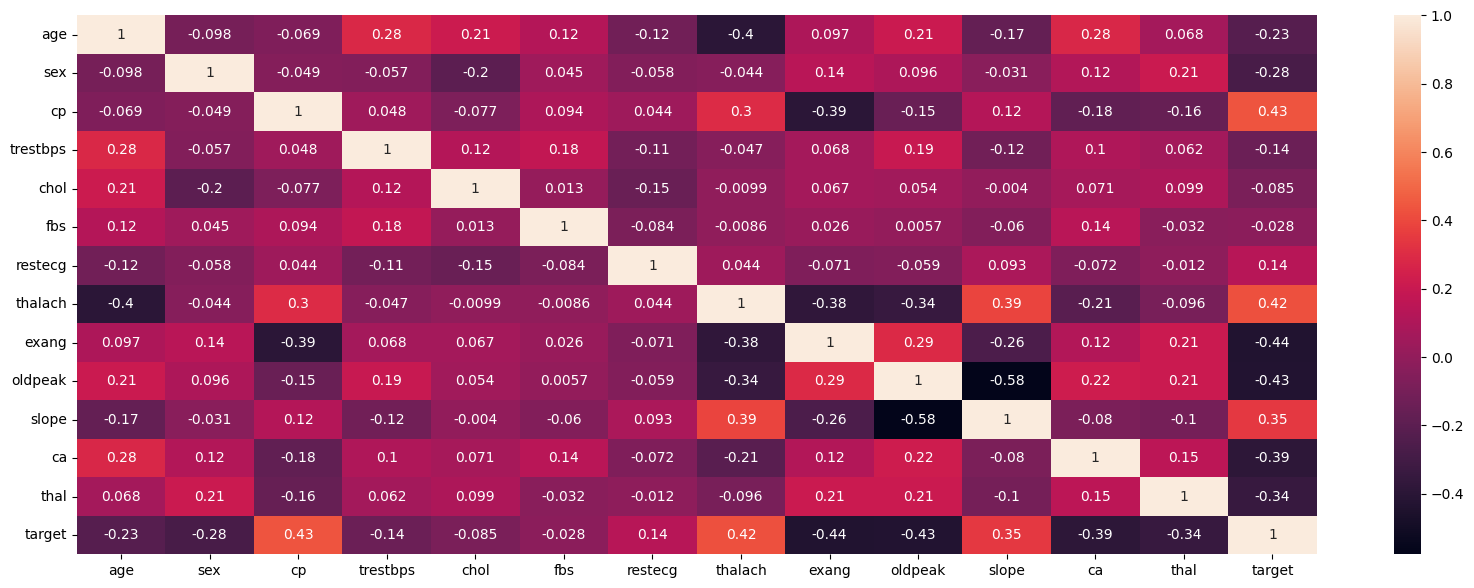

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(heart.corr(), annot=True)
plt.show()

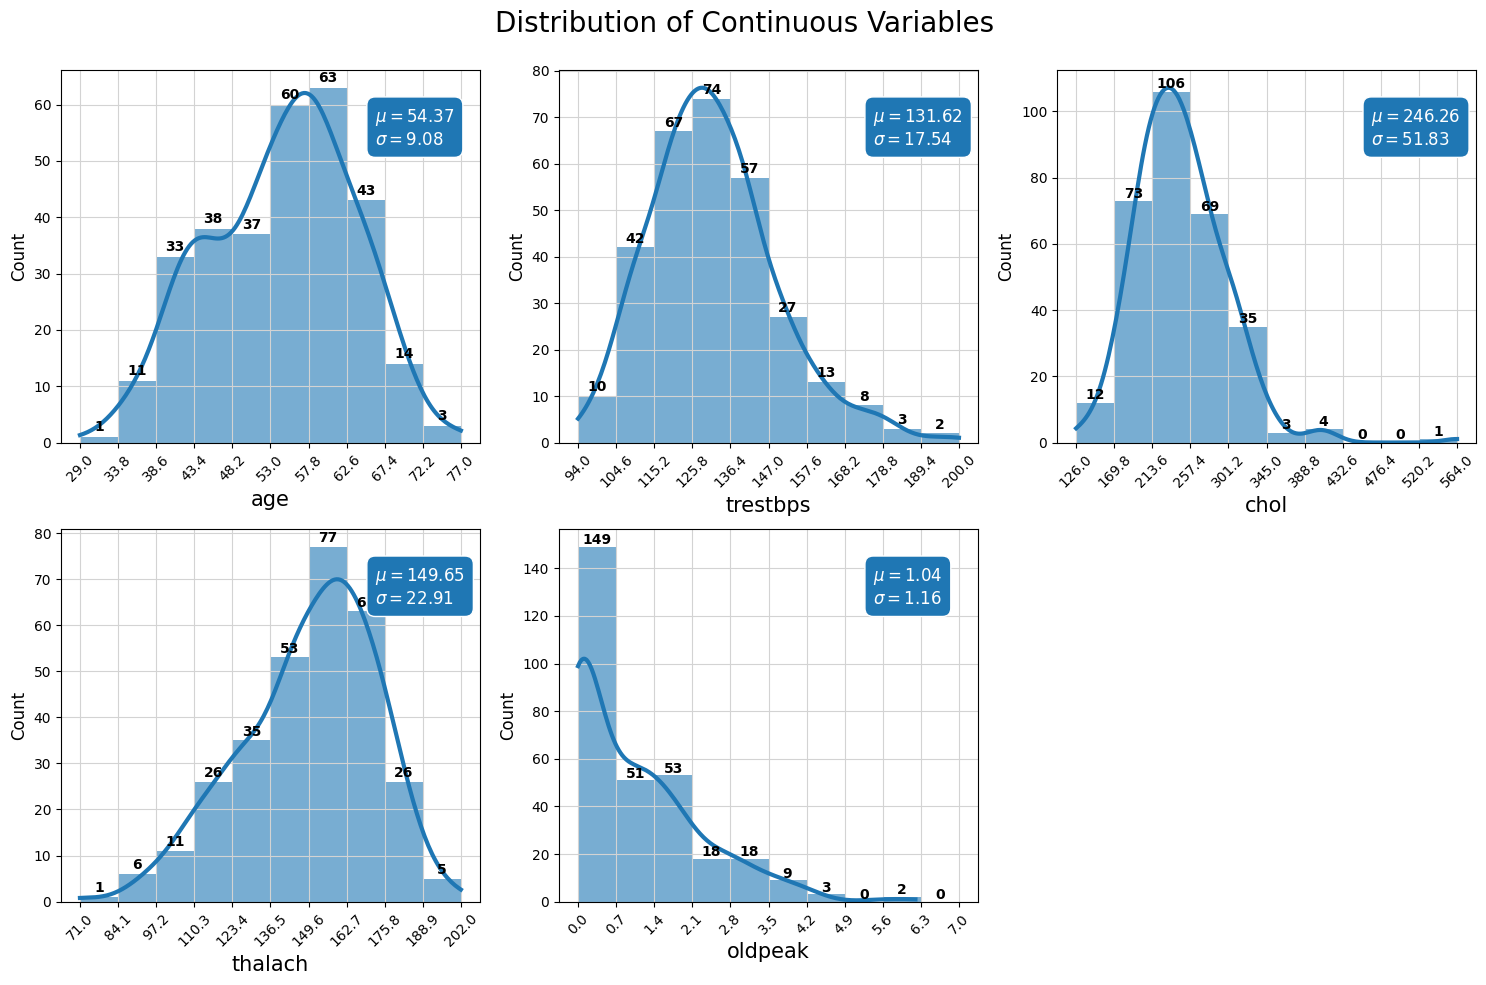

In [16]:
# Filter out continuous features for the univariate analysis
heart_continuous = heart[continuous_variables]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(heart_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(heart_continuous[col], 
                                     range=(np.floor(heart_continuous[col].min()), np.ceil(heart_continuous[col].max())))
    
    graph = sns.histplot(data=heart_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % heart_continuous[col].mean(),
        r'$\sigma=%.2f$' % heart_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [17]:
# Age: The age distribution is relatively even, with a peak in the late 50s. The average age is about 54.37 years, with a standard deviation of 9.08 years.

# Resting Blood Pressure (trestbps): Most individuals have resting blood pressure between 120-140 mm Hg. The average is around 131.62 mm Hg, with a standard deviation of 17.54 mm Hg.

# Serum Cholesterol (chol): Cholesterol levels generally fall between 200 and 300 mg/dl. The mean level is approximately 246.26 mg/dl, with a standard deviation of 51.83 mg/dl.

# Maximum Heart Rate Achieved (thalach): Most people reach a heart rate between 140 and 170 bpm during a stress test. The average maximum heart rate is about 149.65 bpm, with a standard deviation of 22.91 bpm.

# ST Depression Induced by Exercise (oldpeak): Values are mostly close to 0, indicating minimal ST depression during exercise for many. The mean ST depression is 1.04, with a standard deviation of 1.16.

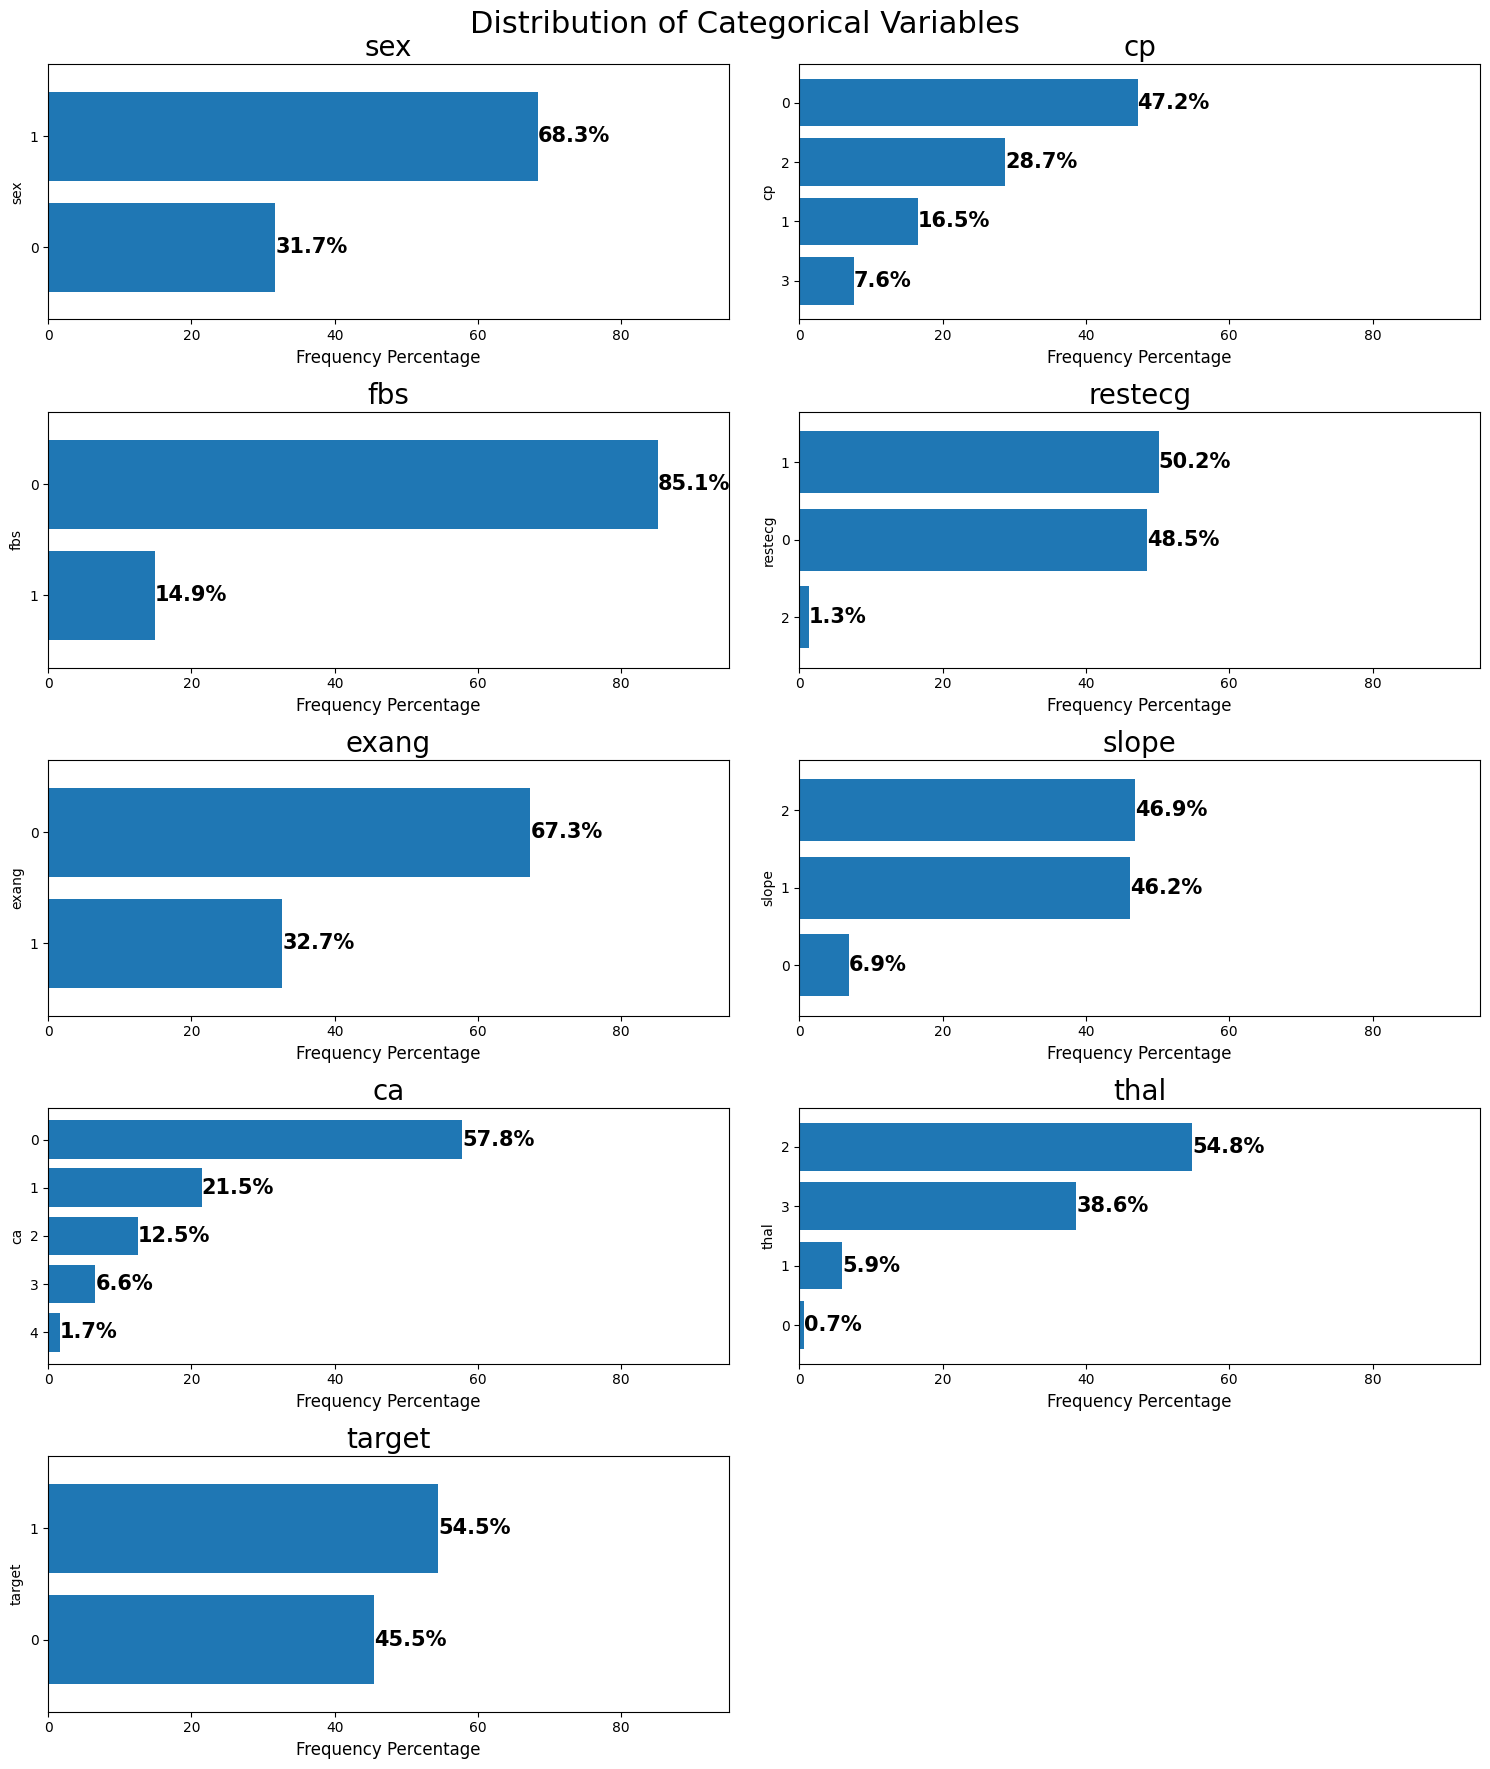

In [18]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

for i, col in enumerate(categorical_variables):
    row = i // 2
    col_idx = i % 2
    
    value_counts = heart[col].value_counts(normalize=True).mul(100).sort_values()
    
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [19]:
# Gender (sex): The dataset is moslty female participants.

# Type of Chest Pain (cp): The dataset includes various types of chest pain, with Type 0 (Typical angina) being the most common in this dataset. 

# Fasting Blood Sugar (fbs): Most patients have fasting blood sugar levels below 120 mg/dl, high fasting blood sugar is uncommon in this dataset.

# Resting Electrocardiographic Results (restecg): The results vary among patients, with certain types appearing more frequently

# Exercise-Induced Angina (exang): The majority of patients do not experience exercise-induced angina, it is not a common symptom in this dataset.

# Slope of the Peak Exercise ST Segment (slope): Flat and Downsloping are more common in this dataset.

# Number of Major Vessels Colored by Fluoroscopy (ca): Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent count.

# Thalium Stress Test Result (thal): Reversible defect is the most common, followed by not described in this dataset

#Presence of Heart Disease (target): The dataset approximately distributed evenly, with 54.5% of patients having heart disease and 45.5% not having it.


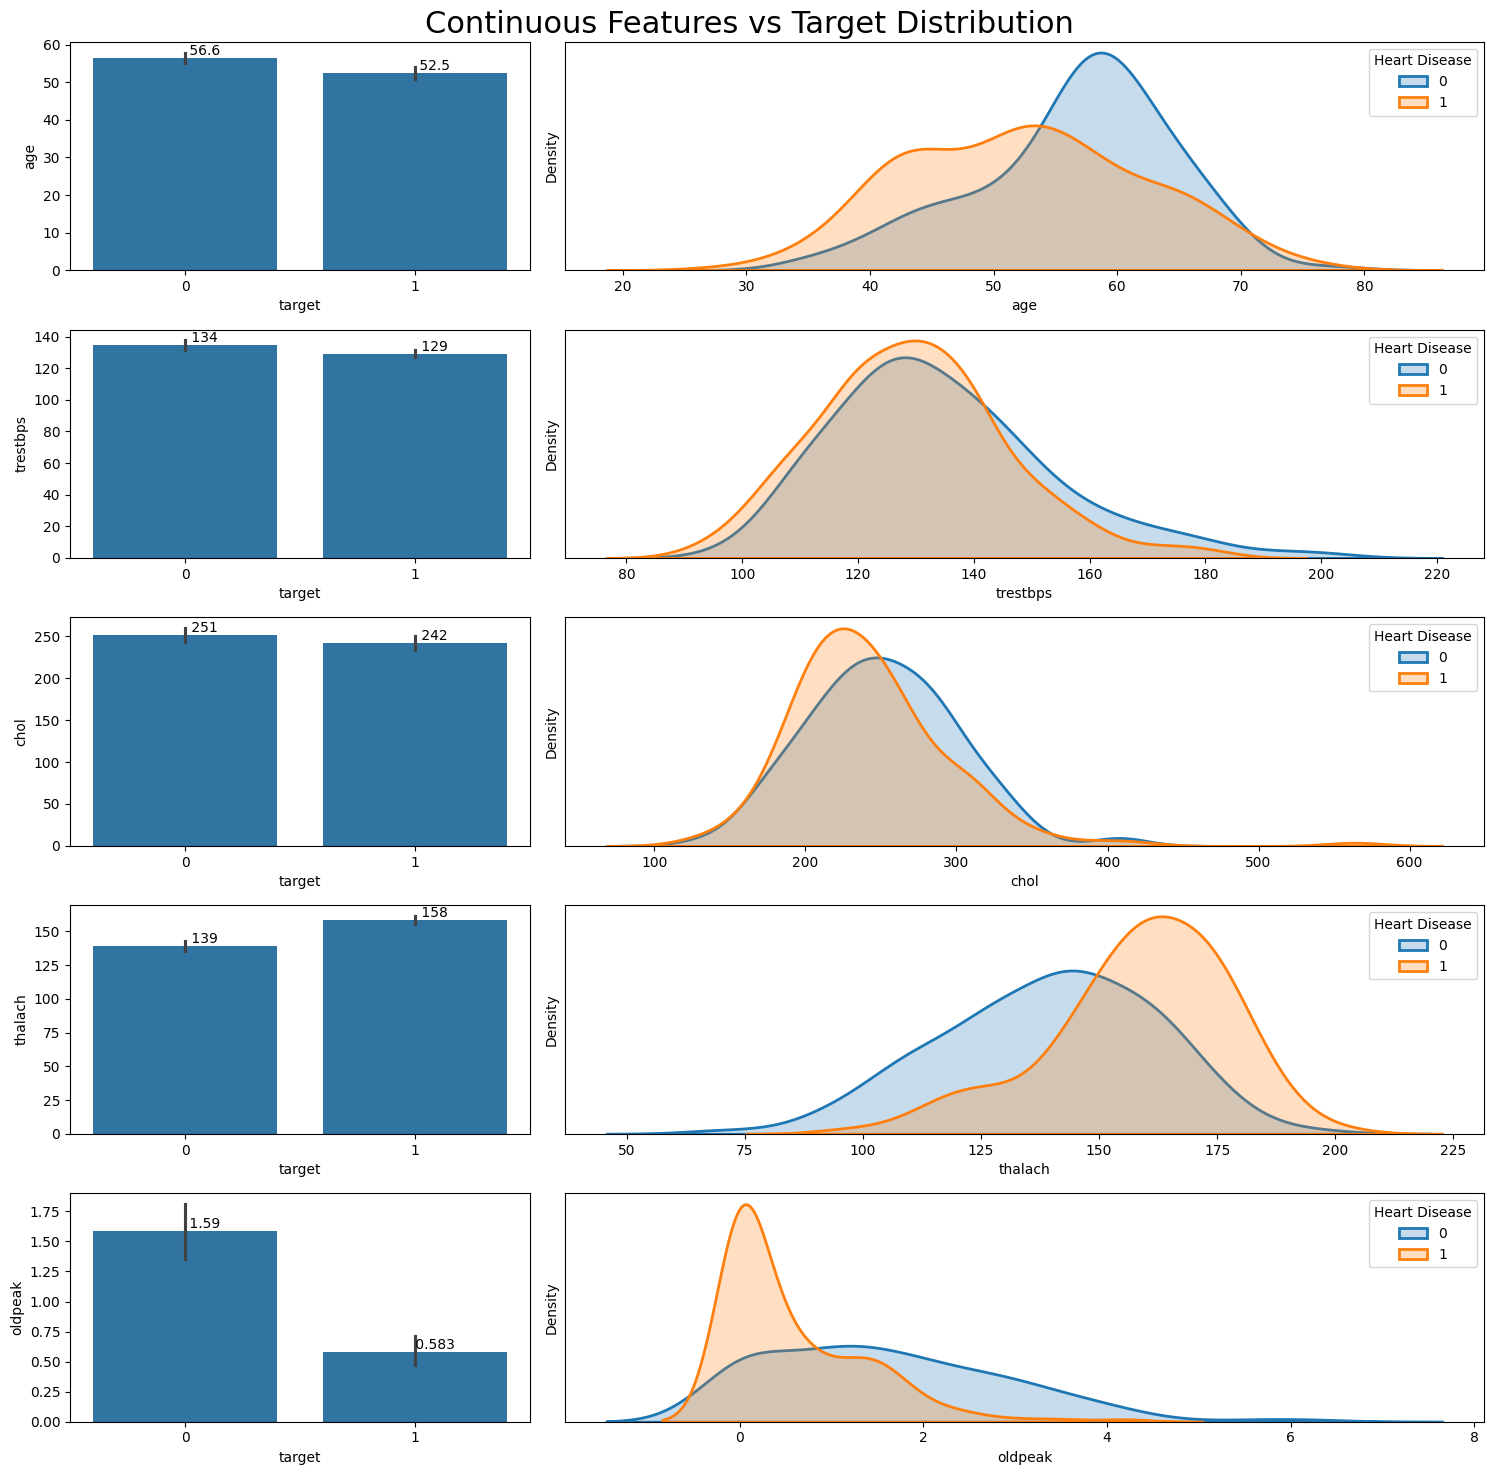

In [20]:
fig, ax = plt.subplots(len(continuous_variables), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_variables):
    graph = sns.barplot(data=heart, x="target", y=col, ax=ax[i,0])
    
    sns.kdeplot(data=heart[heart["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart[heart["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

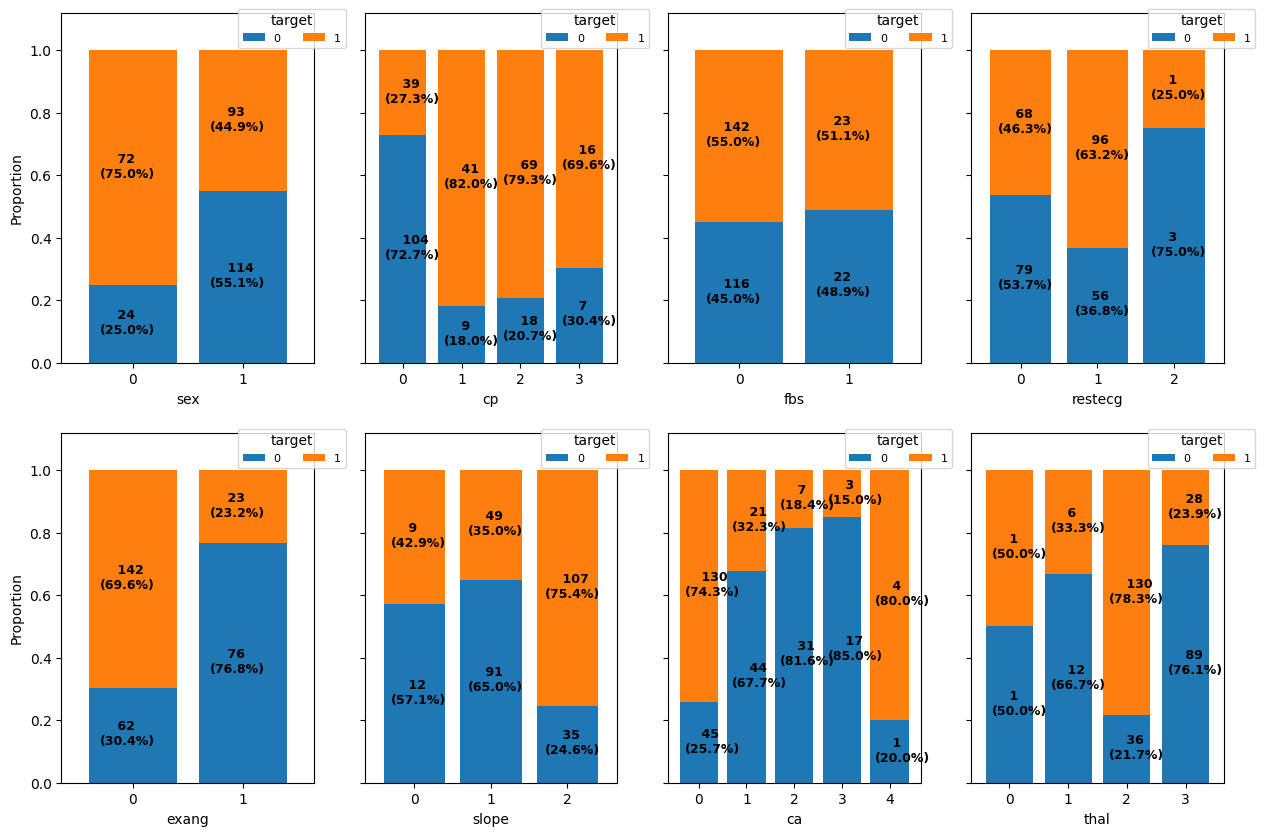

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_variables):
    x, y = divmod(i, 4)  # Equivalent to x = i // 4, y = i % 4

    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=heart[col], columns=heart['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=heart[col], columns=heart['target'], normalize='index')

    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

In [22]:
#Maximum Heart Rate (thalach) seems to have the most impact on the heart disease status, followed by ST Depression (oldpeak) and Age (age).


In [23]:
Q1 = heart[continuous_variables].quantile(0.25)
Q3 = heart[continuous_variables].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((heart[continuous_variables] < (Q1 - 1.5 * IQR)) | (heart[continuous_variables] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [24]:
heart_ml_ready = pd.get_dummies(heart, columns=['cp', 'restecg', 'thal'], drop_first=True)

In [25]:
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    heart_ml_ready[feature] = heart_ml_ready[feature].astype(int)


In [26]:
heart_ml_ready.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [27]:
heart_ml_ready

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,0,False,False,False,True,False,False,False,True
299,45,1,110,264,0,132,0,1.2,1,0,0,False,False,True,True,False,False,False,True
300,68,1,144,193,1,141,0,3.4,1,2,0,False,False,False,True,False,False,False,True
301,57,1,130,131,0,115,1,1.2,1,1,0,False,False,False,True,False,False,False,True


In [28]:
X = heart_ml_ready.drop('target', axis=1)
y = heart_ml_ready['target'] 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
continuous_variables

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [31]:
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.0

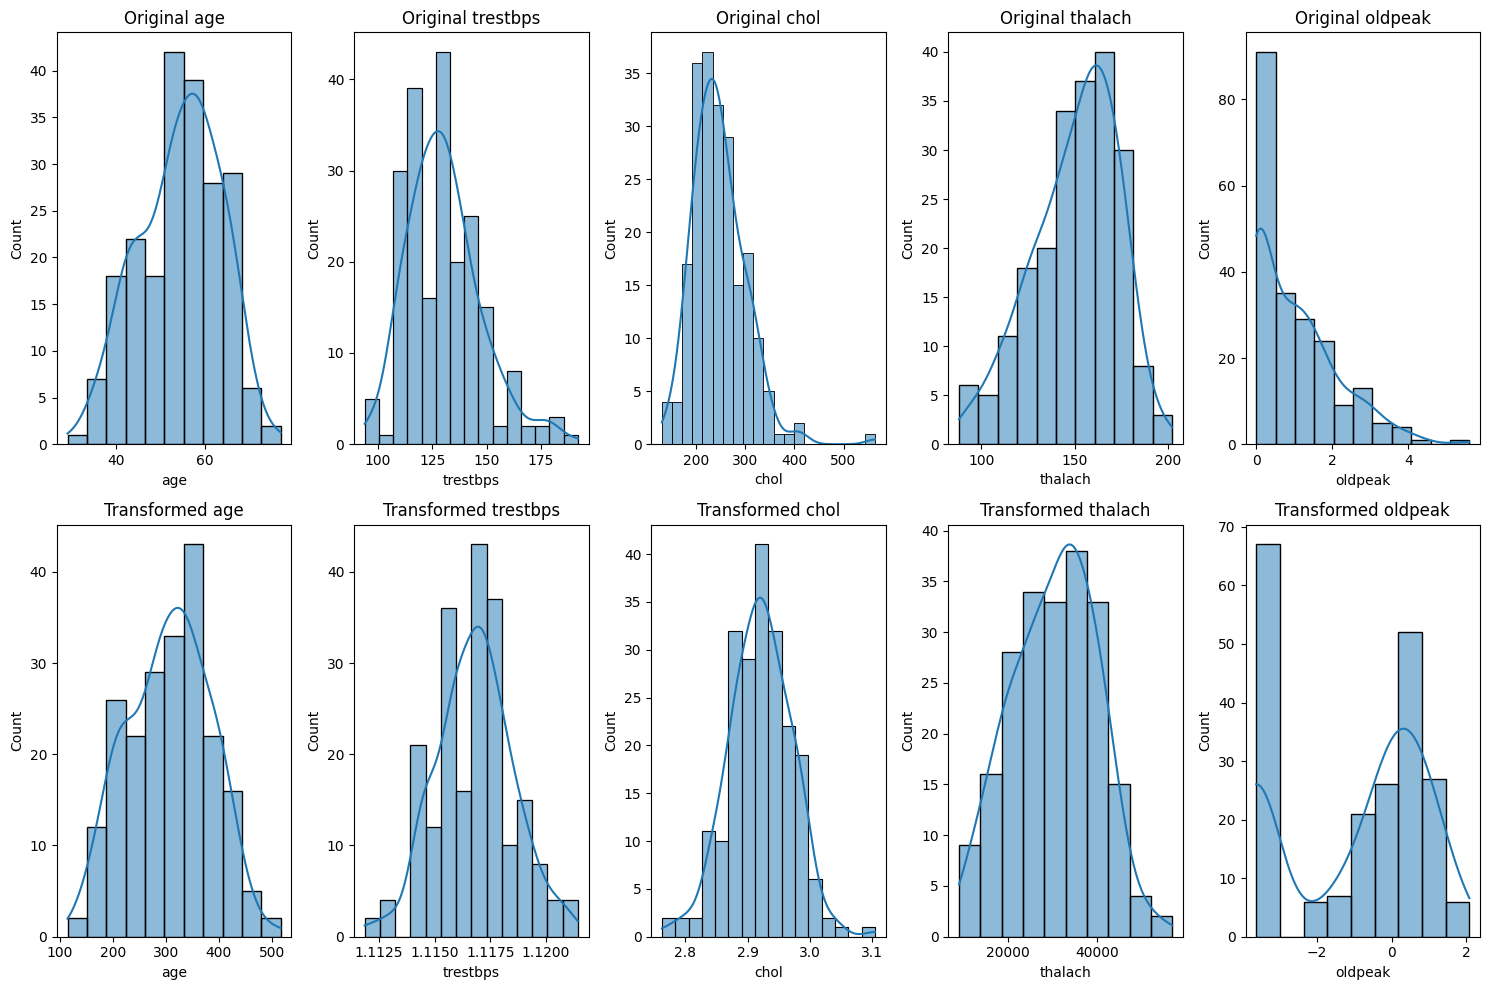

In [32]:
from scipy.stats import boxcox


fig, ax = plt.subplots(2, 5, figsize=(15,10))

for i, col in enumerate(continuous_variables):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i]).set_title(f'Original {col}')
    
lambdas = {}

for i, col in enumerate(continuous_variables):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i]).set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i]).set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()


In [33]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
124,181.269456,0,1.111857,2.873992,0,43560.464272,0,-3.632604,2,0,False,True,False,True,False,False,True,False
72,114.698324,1,1.116958,2.880233,0,56916.012234,0,-3.632604,2,0,True,False,False,False,False,False,True,False
15,265.925117,0,1.115831,2.897857,0,33051.759600,0,0.494830,1,0,False,True,False,True,False,False,True,False
10,299.418040,1,1.117933,2.919121,0,33984.445713,0,0.186746,2,0,False,False,False,True,False,False,True,False
163,174.145736,1,1.117748,2.841017,0,40395.697336,0,-3.632604,2,4,False,True,False,True,False,False,True,False


In [34]:
# In this section we took categorical variables and converted them from object to int64. Based on if order mattered, we applied one-hot encoding. this was to see how to include varaibles in ML models
# data was then randomly split into train and test dataset. 
# Data was trasformed to see if a more symetirical distribution was observed
# data can be used for modeling

In [ ]:
# ROC-AUC Curve

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [37]:

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/jacikapatel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

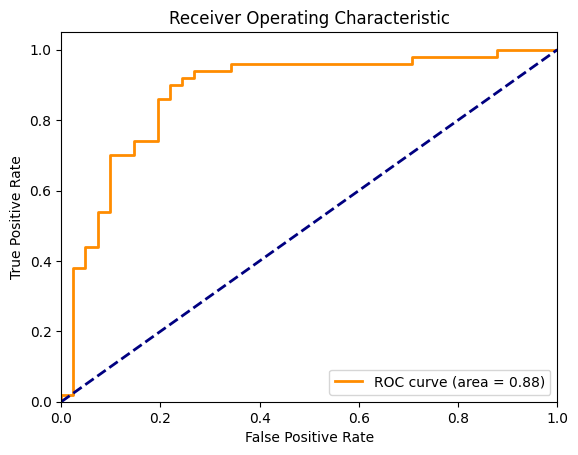

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
# Decision Tree Model

In [43]:
dt_base = DecisionTreeClassifier(random_state=0)

In [44]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    clf_grid.fit(X_train, y_train)

    best_hyperparameters = clf_grid.best_params_
    
    return clf_grid.best_estimator_, best_hyperparameters


In [45]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}


In [46]:
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [47]:
best_dt_hyperparams

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [48]:
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        97
           1       0.88      0.88      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



In [49]:
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [50]:
def evaluate_model(model, X_test, y_test, model_name):

    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [51]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.69,0.83,0.83,0.7,0.76,0.76,0.76,0.76,0.76,0.76


In [52]:
# Random Forest Model

In [53]:
rf_base = RandomForestClassifier(random_state=0)

In [54]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [55]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
best_rf_hyperparams

/Users/jacikapatel/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [56]:
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        97
           1       0.83      0.90      0.86       115

    accuracy                           0.84       212
   macro avg       0.85      0.84      0.84       212
weighted avg       0.85      0.84      0.84       212



In [57]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [58]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.82,0.84,0.8,0.86,0.81,0.85,0.83,0.83,0.83,0.84


In [59]:
# KNN Model

In [60]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [61]:
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [62]:
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)

In [63]:
best_knn_hyperparams

{'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}

In [64]:
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        97
           1       0.88      0.87      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [65]:
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [66]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.79,0.84,0.8,0.82,0.8,0.83,0.81,0.81,0.81,0.81


In [67]:
# SVM Model 

In [68]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

In [69]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [70]:
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
best_svm_hyperparams

{'svm__C': 0.0011,
 'svm__degree': 2,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear'}

In [71]:
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.43      0.60        97
           1       0.67      0.99      0.80       115

    accuracy                           0.74       212
   macro avg       0.83      0.71      0.70       212
weighted avg       0.81      0.74      0.71       212



In [72]:
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        41
           1       0.75      0.96      0.84        50

    accuracy                           0.80        91
   macro avg       0.84      0.78      0.79        91
weighted avg       0.83      0.80      0.79        91



In [73]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.93,0.75,0.61,0.96,0.74,0.84,0.84,0.78,0.79,0.8


In [74]:
#Comparing results from all the models to see which one is the best and most capable to recognoze potential heart patient.

In [75]:
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.93,0.75,0.61,0.96,0.74,0.84,0.84,0.78,0.79,0.80
RF,0.82,0.84,0.80,0.86,0.81,0.85,0.83,0.83,0.83,0.84
KNN,0.79,0.84,0.80,0.82,0.80,0.83,0.81,0.81,0.81,0.81
DT,0.69,0.83,0.83,0.70,0.76,0.76,0.76,0.76,0.76,0.76


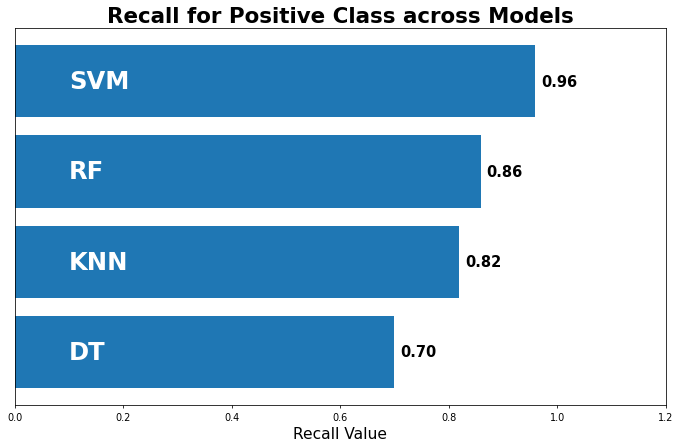

In [76]:
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores)

for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

ax.set_yticks([])

ax.set_xlim([0, 1.2])

plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

In [77]:
#SVM sees to be the best model to use to identify potential heart patients